## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [1]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

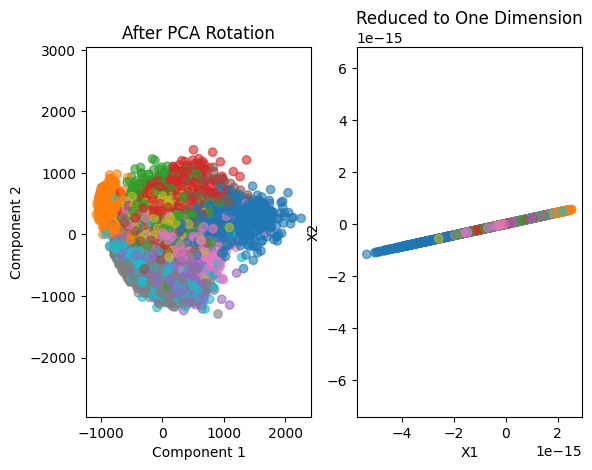

In [2]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mnist_train)

# Step 3: Apply PCA and plot the rotated data
X_reduced = PCA(n_components=1).fit_transform(X_mnist_train)
X_reconstructed = PCA(n_components=1).fit(X_mnist_train).inverse_transform(X_reduced)

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_mnist_train, cmap="tab10", alpha=0.6)
plt.title("After PCA Rotation")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y_mnist_train, cmap="tab10", alpha=.6)
plt.title("Reduced to One Dimension")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')

plt.show()

#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

Variance Explained per Principal Component: [0.10213681 0.07338066 0.06114693 0.05576044 0.04840076 0.04379909
 0.03306719 0.02929972 0.02760152 0.02300659 0.02133275 0.02037974
 0.01693302 0.01654811 0.01605459 0.01526456 0.01291425 0.01259637
 0.01185214 0.0113754  0.0103098  0.00992311 0.0095391  0.0092769
 0.00873732 0.00859172 0.00789126 0.00763667 0.007269   0.00686596
 0.00659872 0.00626282 0.00602267 0.00574626 0.00542867 0.00528007
 0.00514839 0.00482551 0.0047143  0.0045296 ]


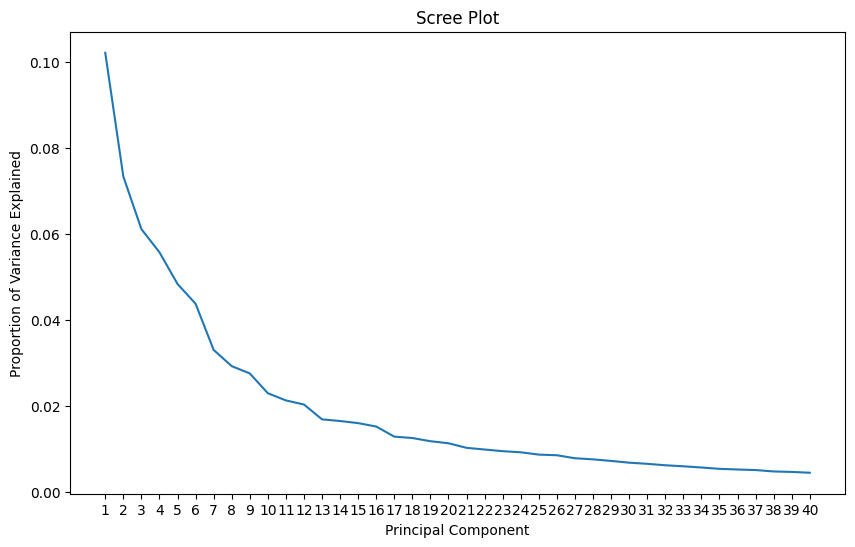

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Run PCA with 40 components
pca_full = PCA(n_components=40)
pca_full.fit(X_mnist_train)

variance_explained = pca_full.explained_variance_ratio_
print("Variance Explained per Principal Component:", variance_explained)

# Step 4: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(variance_explained) + 1))
plt.show()


#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [4]:
# Fit PCA to the training data (all components)
pca_high_dim = PCA()
pca_high_dim.fit(X_mnist_train)

# Compute cumulative explained variance
cumulative_variance_explained = np.cumsum(pca_high_dim.explained_variance_ratio_)

# Find the number of components for desired explained variance
threshold = 0.95  # 95% variance
n_components = np.argmax(cumulative_variance_explained >= threshold) + 1

print(f"Number of components needed for {threshold*100:.0f}% variance: {n_components}")
#148

Number of components needed for 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

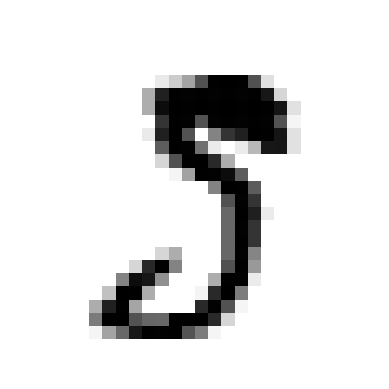

In [5]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

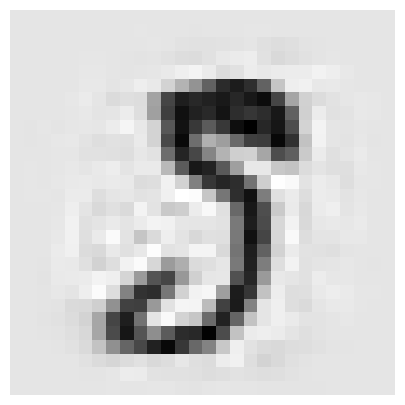

In [6]:
# Step 1: Fit PCA with optimal number of components from Step 4
pca_optimal = PCA(n_components=148)
pca_optimal.fit(X_mnist_train)

digit_reduced = pca_optimal.transform(X_mnist_train[0].reshape(1, -1))

digit_reconstructed = pca_optimal.inverse_transform(digit_reduced)

plt.figure(figsize=(8,5))


plot_mnist_digit(digit_reconstructed[0])  # reconstructed
plt.show()


### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [7]:
# Step 5: k-NN Classification

# Without PCA
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print(f"Original Data Accuracy: {accuracy_score(y_mnist_test, y_pred)}")

# With PCA
pca_high_dim = PCA()
pca_high_dim.fit(X_mnist_train)

cumulative_variance_explained = np.cumsum(pca_high_dim.explained_variance_ratio_)
threshold = 0.8
n_components = np.argmax(cumulative_variance_explained >= threshold) + 1 
print(f"Number of components for {threshold*100}% variance: {n_components}")

# Reduce dimensionality to n_components
PCA_KNN = PCA(n_components=42)
X_pca_KNN_train = PCA_KNN.fit_transform(X_mnist_train)
X_pca_KNN_test  = PCA_KNN.transform(X_mnist_test)

# Train and test k-NN
knn = KNeighborsClassifier()
knn.fit(X_pca_KNN_train, y_mnist_train)

y_pred_pca = knn.predict(X_pca_KNN_test)
print(f"PCA-transformed Data Accuracy: {accuracy_score(y_mnist_test, y_pred_pca)}")


Original Data Accuracy: 0.9421428571428572
Number of components for 80.0% variance: 42
PCA-transformed Data Accuracy: 0.9535714285714286


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

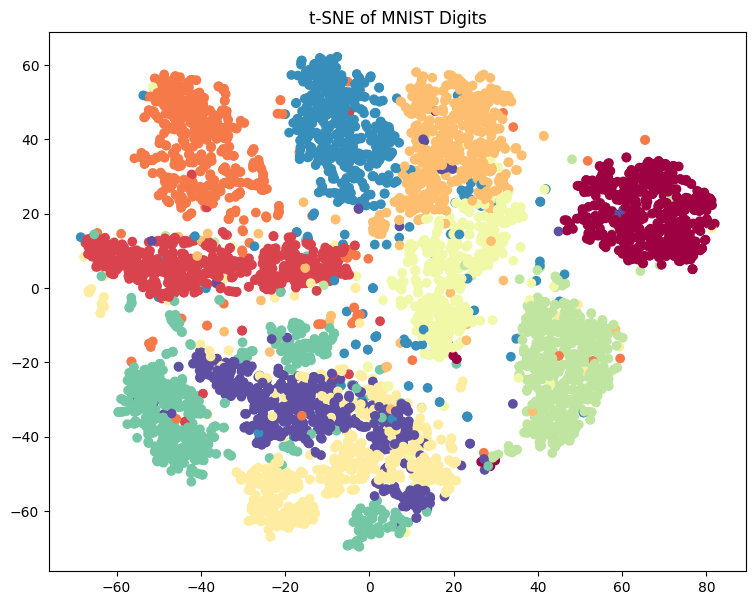

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Run t-SNE (2D)
tsne = TSNE(
    n_components=2,
    random_state=42
)
X_tsne = tsne.fit_transform(X_mnist_train)

# Plot t-SNE
plt.figure(figsize=(9,7))
scatter = plt.scatter(
    X_tsne[:,0], X_tsne[:,1],
    c=y_mnist_train,
    cmap=plt.cm.Spectral,
)
plt.title("t-SNE of MNIST Digits")
plt.show()


2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [9]:
X_all = np.vstack([X_mnist_train, X_mnist_test])
y_all = np.hstack([y_mnist_train, y_mnist_test])

tsne = TSNE(
    n_components=2,
    random_state=42
)
X_tsne_all = tsne.fit_transform(X_all)

X_tsne_train = X_tsne_all[:len(X_mnist_train)]
X_tsne_test  = X_tsne_all[len(X_mnist_train):]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tsne_train, y_mnist_train)

y_pred_tsne = knn.predict(X_tsne_test)

print(f"Accuracy: {accuracy_score(y_mnist_test, y_pred_tsne)}")



Accuracy: 0.9392857142857143


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [10]:
import umap

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_mnist_train)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


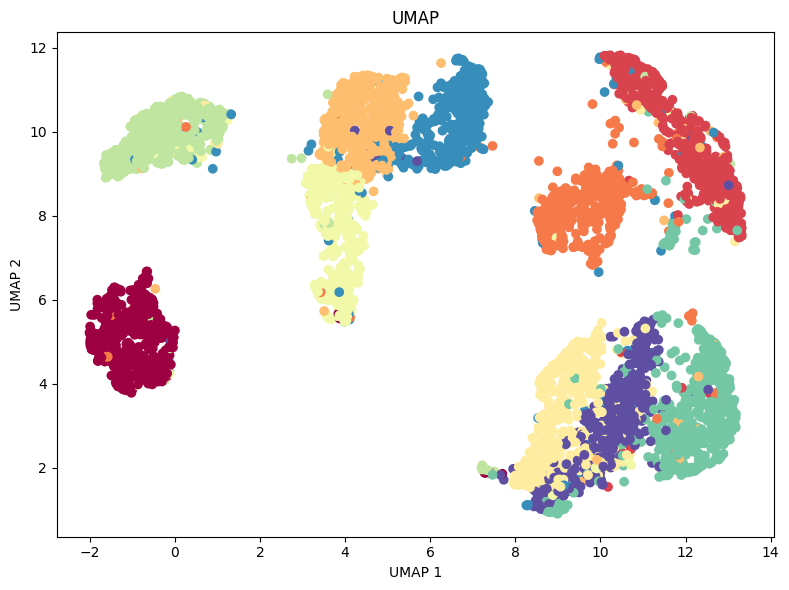

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_mnist_train, cmap=plt.cm.Spectral)
plt.title('UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()
plt.show()

Now, calculate accuracy with KNN.

In [12]:
import umap.umap_ as umap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap_train = umap_model.fit_transform(X_mnist_train)

X_umap_test = umap_model.transform(X_mnist_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_umap_train, y_mnist_train)

y_pred_umap = knn.predict(X_umap_test)

print(f"Accuracy: {accuracy_score(y_mnist_test, y_pred_umap):.4f}")


/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Accuracy: 0.8857


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


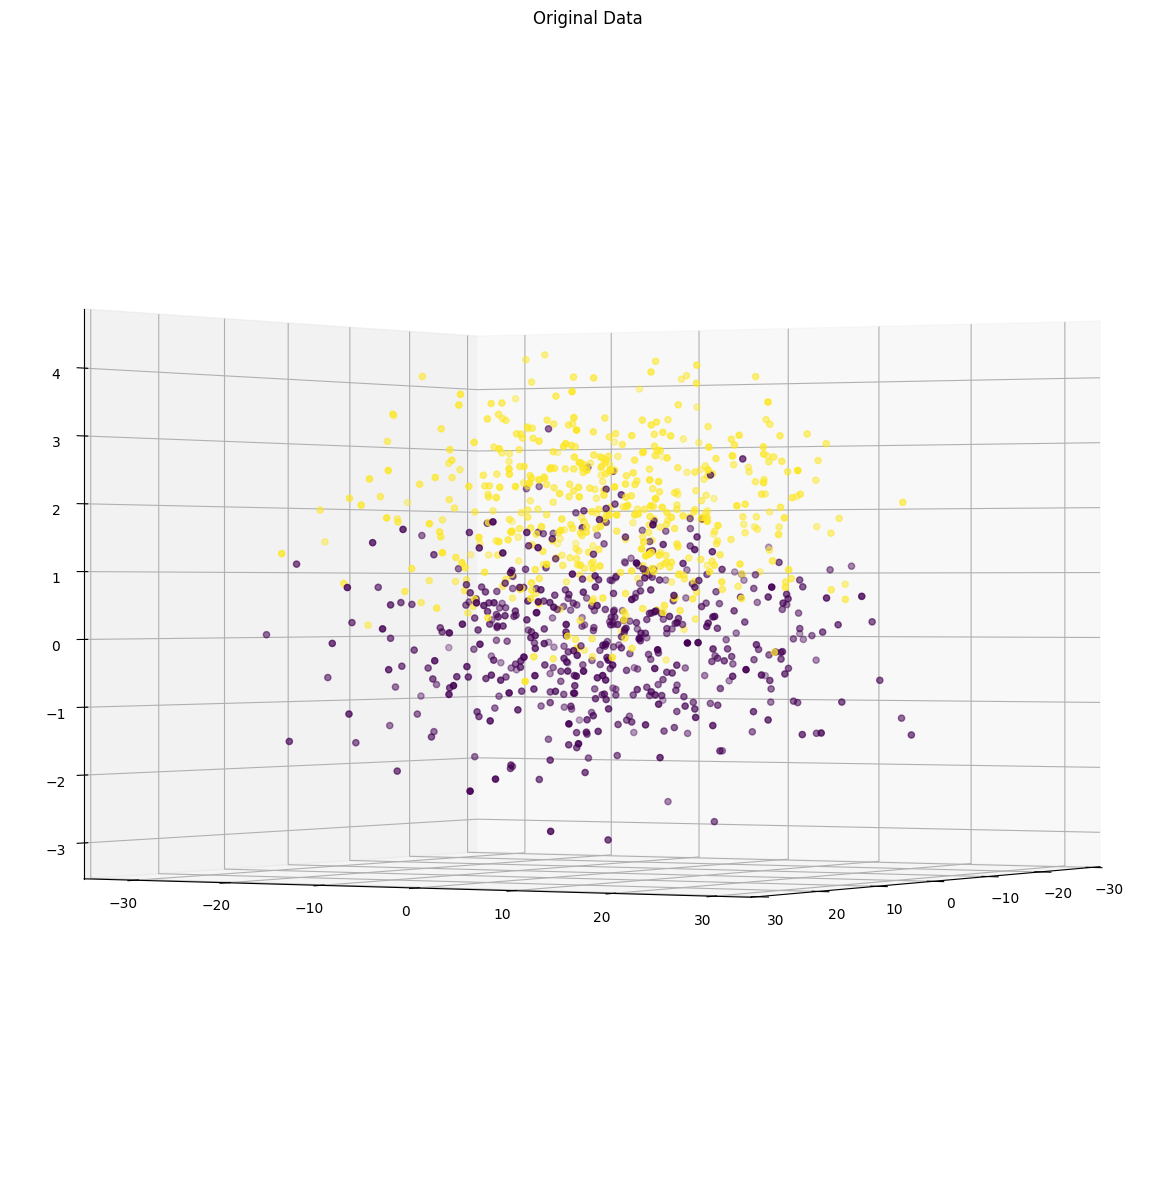

In [46]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))


# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [40]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

Number of components for 95.0% variance: 2


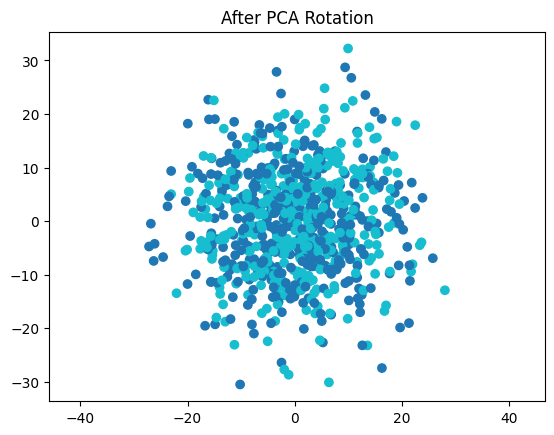

In [41]:
pca_high_dim = PCA()
pca_high_dim.fit(X_train)

cumulative_variance_explained = np.cumsum(pca_high_dim.explained_variance_ratio_)
threshold = 0.95
n_components = np.argmax(cumulative_variance_explained >= threshold) + 1 
print(f"Number of components for {threshold*100}% variance: {n_components}")

PCA_KNN = PCA(n_components=2)
X_pca_KNN_train = PCA_KNN.fit_transform(X_train)
X_pca_KNN_test  = PCA_KNN.transform(X_test)

plt.scatter(X_pca_KNN_train[:, 0], X_pca_KNN_train[:, 1], c=y_train, cmap="tab10")
plt.title("After PCA Rotation")
plt.axis('equal')
plt.show()

In [42]:
# Train and test k-NN
knn = KNeighborsClassifier()
knn.fit(X_pca_KNN_train, y_train)

y_pred_pca = knn.predict(X_pca_KNN_test)
print(f"PCA-transformed Data Accuracy: {accuracy_score(y_test, y_pred_pca)}")

PCA-transformed Data Accuracy: 0.505


2. Try with UMAP.

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


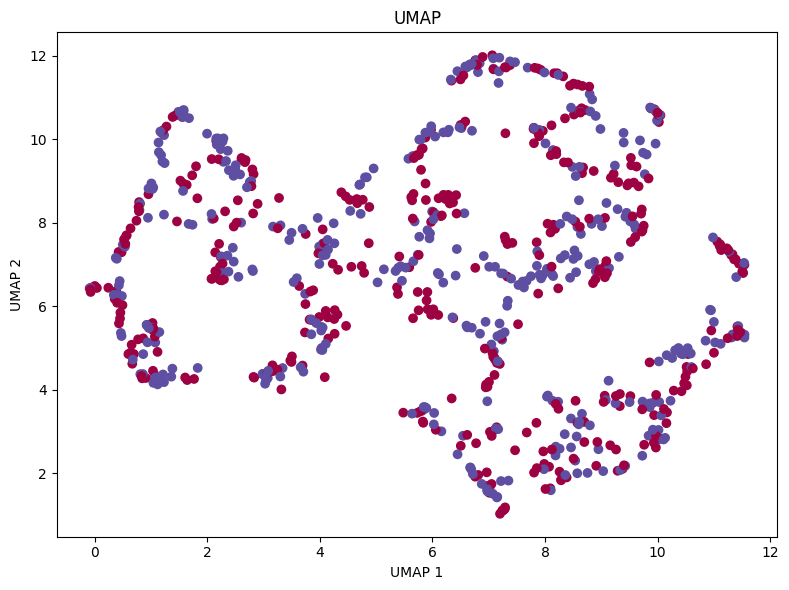

In [43]:
umap_model = umap.UMAP(random_state=42)




X_umap_train = umap_model.fit_transform(X_train)

X_umap_test = umap_model.transform(X_test)


plt.figure(figsize=(8,6))
plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.title('UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_umap_train, y_train)

y_pred_umap = knn.predict(X_umap_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_umap):.4f}")

Accuracy: 0.5700


Explain your results in the cell below.  Which works better?  Why?

UMAP Works better likely due to the fact that the data is not linear and therefore PCA which assumes linearity, is not the best way to conduct dimensionality reduction. However predictions made without dimensionality reduction performed worse than predictions on the original data therefore in this case it may note even be required.